In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

#### 기본적인 열연, 철강석, 유연탄, PMI 데이터 불러온 과정

In [3]:
file_path = 'final지표.xlsx'

# Excel 파일 불러오기
df = pd.read_excel(file_path)

df.set_index('날짜', inplace = True)
# 데이터프레임 확인
df

,철광석가격,철광석변화율,열연선물가격,열연선물변화율,스프레드,스프레드변화율,유연탄가격,유연탄변화율,pmi,pmi변화율
날짜,,,,,,,,,,
2013-02-01,153.64,1.842768,633.0,0.000000,479.36,-0.576596,73.90,0.612662,50.4,-0.395257
2013-02-04,156.15,1.633689,633.0,0.000000,476.85,-0.523615,75.05,1.556157,50.4,-0.395257
2013-02-05,154.83,-0.845341,633.0,0.000000,478.17,0.276817,75.05,1.556157,50.4,-0.395257
2013-02-06,155.97,0.736291,628.0,-0.789889,472.03,-1.284062,75.05,1.556157,50.4,-0.395257
2013-02-07,156.65,0.435981,625.0,-0.477707,468.35,-0.779611,75.05,1.556157,50.4,-0.395257
...,...,...,...,...,...,...,...,...,...,...
2023-09-25,121.18,-0.123630,710.0,-1.388889,588.82,-1.645314,92.42,1.549280,50.2,1.006036
2023-09-26,120.93,-0.206305,711.0,0.140845,590.07,0.212289,92.42,1.549280,50.2,1.006036
2023-09-27,120.84,-0.074423,717.0,0.843882,596.16,1.032081,92.42,1.549280,50.2,1.006036


In [4]:
usedf = pd.DataFrame()
usedf['스프레드'] = df['스프레드']
usedf['pmi'] = df['pmi']
usedf['유연탄가격'] = df['유연탄가격']
usedf['열연선물가격'] = df['열연선물가격']

In [5]:
usedf

,스프레드,pmi,유연탄가격,열연선물가격
날짜,,,,
2013-02-01,479.36,50.4,73.90,633.0
2013-02-04,476.85,50.4,75.05,633.0
2013-02-05,478.17,50.4,75.05,633.0
2013-02-06,472.03,50.4,75.05,628.0
2013-02-07,468.35,50.4,75.05,625.0
...,...,...,...,...
2023-09-25,588.82,50.2,92.42,710.0
2023-09-26,590.07,50.2,92.42,711.0
2023-09-27,596.16,50.2,92.42,717.0


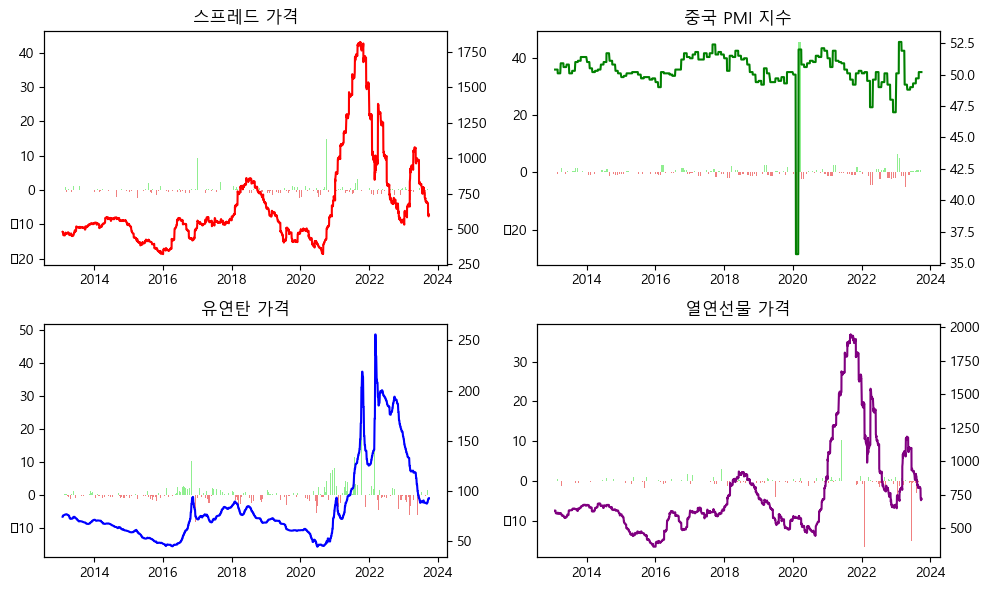

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 각 subplot에 데이터를 그래프로 플로팅
axs[0, 0].bar(df.index, df['스프레드변화율'], color=['lightgreen' if val >= 0 else 'lightcoral' for val in df['스프레드변화율']])
axs0 = axs[0, 0].twinx()
axs0.plot(usedf.index, usedf['스프레드'], label='스프레드', color='red')
axs[0, 0].set_title('스프레드 가격')

axs[0, 1].bar(df.index, df['pmi변화율'], color=['lightgreen' if val >= 0 else 'lightcoral' for val in df['pmi변화율']])
axs1 = axs[0, 1].twinx()
axs1.plot(usedf.index, usedf['pmi'], label='pmi', color='green')
axs[0, 1].set_title('중국 PMI 지수')

axs[1, 0].bar(df.index, df['유연탄변화율'], color=['lightgreen' if val >= 0 else 'lightcoral' for val in df['유연탄변화율']])
axs2 = axs[1, 0].twinx()
axs2.plot(usedf.index, usedf['유연탄가격'], label='유연탄가격', color='blue')
axs[1, 0].set_title('유연탄 가격')

axs[1, 1].bar(df.index, df['열연선물변화율'], color=['lightgreen' if val >= 0 else 'lightcoral' for val in df['열연선물변화율']])
axs3 = axs[1, 1].twinx()
axs3.plot(usedf.index, usedf['열연선물가격'], label='열연선물가격', color='purple')
axs[1, 1].set_title('열연선물 가격')


plt.tight_layout()  # subplot 간 간격 조절
plt.show()

#### 기본적인 데이터 불러오기 및 정리가 끝났고 이제 이들을 하나로 합친 지수 그래프 따로 만들 단계 !!

In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체를 생성합니다.
scaler = StandardScaler()

# 각 데이터프레임의 'value' 열을 표준화합니다.
usedf_scaled = scaler.fit_transform(usedf)
usedf_scaled = pd.DataFrame(usedf_scaled, columns = usedf.columns, index=usedf.index)

In [8]:
usedf_scaled

,스프레드,pmi,유연탄가격,열연선물가격
날짜,,,,
2013-02-01,-0.584604,0.028618,-0.241476,-0.381939
2013-02-04,-0.592514,0.028618,-0.212419,-0.381939
2013-02-05,-0.588354,0.028618,-0.212419,-0.381939
2013-02-06,-0.607705,0.028618,-0.212419,-0.396709
2013-02-07,-0.619302,0.028618,-0.212419,-0.405571
...,...,...,...,...
2023-09-25,-0.239635,-0.101110,0.226472,-0.154484
2023-09-26,-0.235695,-0.101110,0.226472,-0.151530
2023-09-27,-0.216502,-0.101110,0.226472,-0.133806


### 저는 여기서 제일 단순하게 1:1:1 더하기를 사용했습니다. 가중치는 본인이 최적화 해주시면 됩니다

In [9]:
df_index = pd.DataFrame(index=usedf.index)

c1 = 0.5
c2 = 0.5
c3 = 0.5
c4 = 0.5

df_index['index'] = c1 * usedf_scaled[usedf.columns[0]] + c2 * usedf_scaled[usedf.columns[1]] + c3 * usedf_scaled[usedf.columns[2]] + c4 * usedf_scaled[usedf.columns[3]]

In [10]:
df_index

,index
날짜,
2013-02-01,-0.589701
2013-02-04,-0.579127
2013-02-05,-0.577047
2013-02-06,-0.594107
2013-02-07,-0.604337
...,...
2023-09-25,-0.134378
2023-09-26,-0.130931
2023-09-27,-0.112473


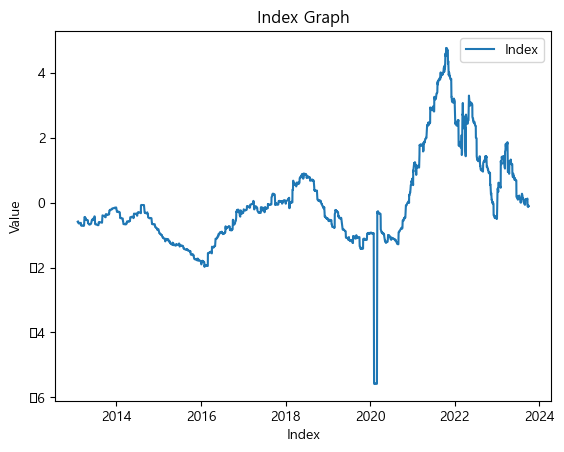

In [11]:
plt.plot(df_index.index, df_index['index'], label='Index')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Index Graph')
plt.legend()
plt.show()

### 합친 지수 그래프로 이평선도 그리기 (이평선은 신호 생성을 위해 만듭니다)

In [12]:
# 단기 이평선 데이터 생성 : 2달 기준 거래일수 42로 설정
df_index['index_moving_short_avg'] = df_index['index'].rolling(window=42, min_periods=1).mean()

# 장기 이평선 데이터 생성 : 1년 기준 거래일수 250로 설정
df_index['index_moving_long_avg'] = df_index['index'].rolling(window=250, min_periods=1).mean()

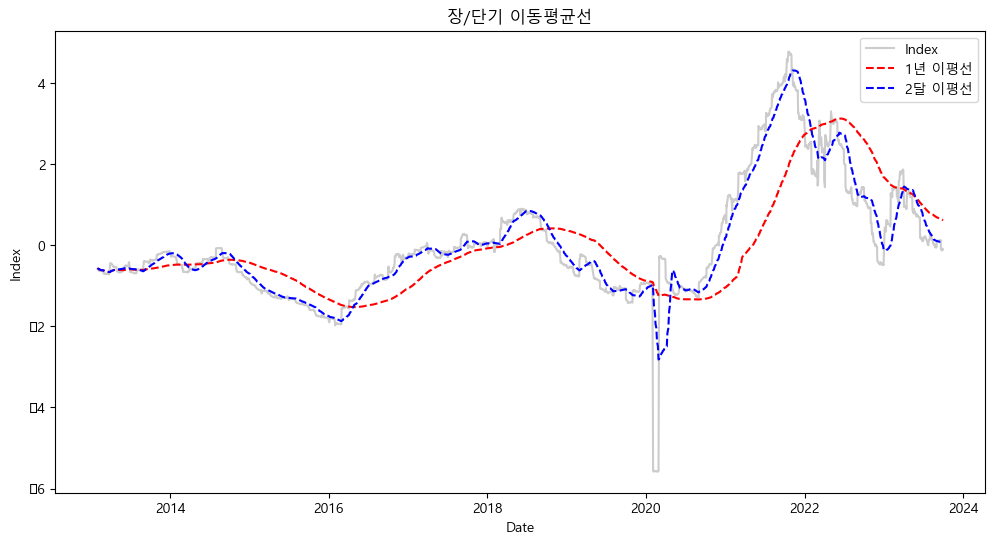

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_index['index'], label='Index', color = '#CCCCCC')
plt.plot(df_index['index_moving_long_avg'], label='1년 이평선', linestyle='--', color = 'red')
plt.plot(df_index['index_moving_short_avg'], label='2달 이평선', linestyle='--', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('장/단기 이동평균선')
plt.legend()
plt.show()

In [14]:
df_index

,index,index_moving_short_avg,index_moving_long_avg
날짜,,,
2013-02-01,-0.589701,-0.589701,-0.589701
2013-02-04,-0.579127,-0.584414,-0.584414
2013-02-05,-0.577047,-0.581958,-0.581958
2013-02-06,-0.594107,-0.584996,-0.584996
2013-02-07,-0.604337,-0.588864,-0.588864
...,...,...,...
2023-09-25,-0.134378,0.067860,0.626787
2023-09-26,-0.130931,0.063815,0.621195
2023-09-27,-0.112473,0.058690,0.615663


#### 매수 / 매도 신호 만들기. 금융 머신러닝 전략 비트코인 부분 참조하면 됩니다

In [15]:
df_index['signal'] = np.where(df_index['index_moving_short_avg'] > df_index['index_moving_long_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
df_index 

,index,index_moving_short_avg,index_moving_long_avg,signal
날짜,,,,
2013-02-01,-0.589701,-0.589701,-0.589701,0.0
2013-02-04,-0.579127,-0.584414,-0.584414,0.0
2013-02-05,-0.577047,-0.581958,-0.581958,0.0
2013-02-06,-0.594107,-0.584996,-0.584996,0.0
2013-02-07,-0.604337,-0.588864,-0.588864,0.0
...,...,...,...,...
2023-09-25,-0.134378,0.067860,0.626787,0.0
2023-09-26,-0.130931,0.063815,0.621195,0.0
2023-09-27,-0.112473,0.058690,0.615663,0.0


In [16]:
buy_count = df_index[df_index['signal'] == 1.0].shape[0]
print("Signal 값이 1.0인 행의 개수는 {}개 입니다.".format(buy_count))

sell_count = df_index[df_index['signal'] == 0.0].shape[0]
print("Signal 값이 1.0인 행의 개수는 {}개 입니다.".format(sell_count))

Signal 값이 1.0인 행의 개수는 1337개 입니다.
Signal 값이 1.0인 행의 개수는 1197개 입니다.


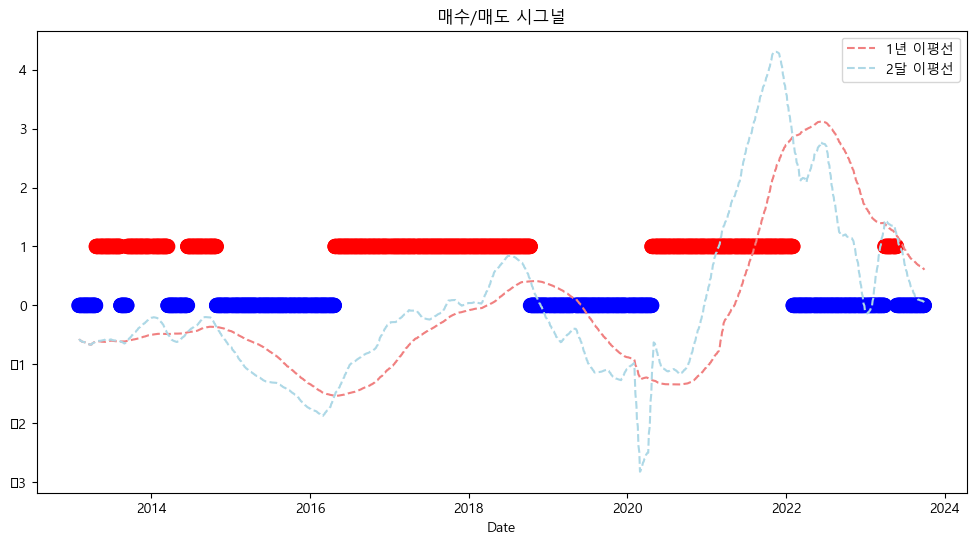

In [17]:
plt.figure(figsize=(12, 6))

data = df_index['signal']

# 데이터의 길이
n = len(data)

# 데이터에 대한 x 좌표 생성

# 데이터를 점 그래프로 나타내기

plt.plot(df_index['index_moving_long_avg'], label='1년 이평선', linestyle='--', color = 'lightcoral')
plt.plot(df_index['index_moving_short_avg'], label='2달 이평선', linestyle='--', color = 'lightblue')
plt.scatter(df_index.index,data, c=['blue' if value == 0 else 'red' for value in data], cmap='viridis', s=100)
# 그래프에 제목과 축 레이블 추가
plt.title('매수/매도 시그널')
plt.xlabel('Date')

plt.legend()

# 그래프 표시
plt.show()

### 실제 수익 백테스팅을 위해서 종목별 주가를 가져옵니다. 이 파일에서는 한국 포스코만 가져왔습니다. 외국 주가는 두번쨰 파일에 가져오는 과정이 있습니다

### 지금부터 종목별 주가 가져와서 종가 (가격)만 지수 그래프에 병합하는 과정을 보시면 됩니다

In [18]:
import yfinance as yf

FINDATA = yf.download('5401.T', start = '2013-01-01', end = '2023-09-30')

# 'Date' 열을 datetime 타입으로 변환
df_close = FINDATA[['Close']]


[*********************100%%**********************]  1 of 1 completed


In [19]:
df_close

,Close
Date,
2013-01-04,2180.0
2013-01-07,2160.0
2013-01-08,2140.0
2013-01-09,2120.0
2013-01-10,2220.0
...,...
2023-09-25,3717.0
2023-09-26,3713.0
2023-09-27,3676.0


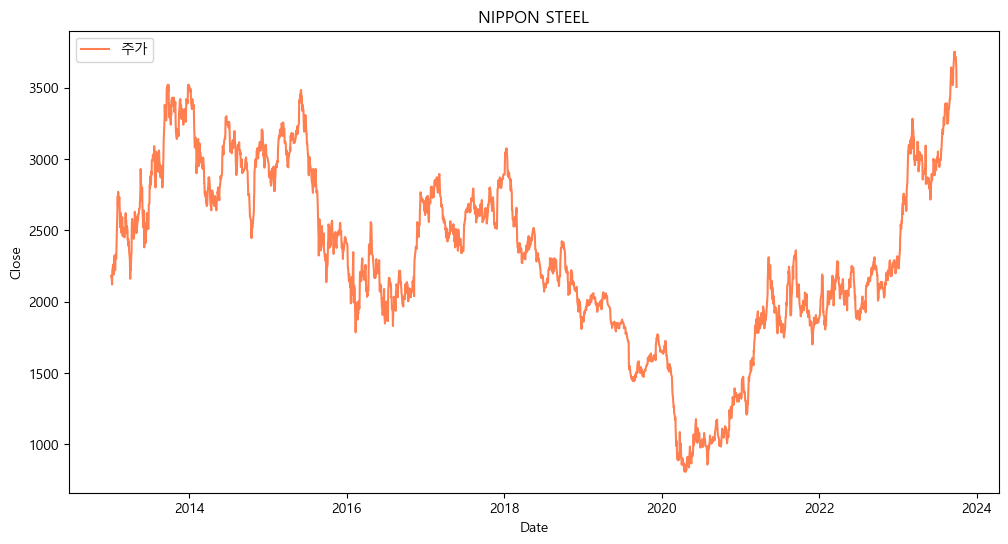

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_close, label='주가', color = 'coral')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('NIPPON STEEL')
plt.legend()
plt.show()

In [21]:
# 두 데이터프레임을 옆으로 붙이기
df_index['Close'] = df_close['Close']

In [22]:
df_index.dropna(inplace = True)

In [23]:
df_index

,index,index_moving_short_avg,index_moving_long_avg,signal,Close
날짜,,,,,
2013-02-01,-0.589701,-0.589701,-0.589701,0.0,2550.0
2013-02-04,-0.579127,-0.584414,-0.584414,0.0,2740.0
2013-02-05,-0.577047,-0.581958,-0.581958,0.0,2670.0
2013-02-06,-0.594107,-0.584996,-0.584996,0.0,2770.0
2013-02-07,-0.604337,-0.588864,-0.588864,0.0,2730.0
...,...,...,...,...,...
2023-09-25,-0.134378,0.067860,0.626787,0.0,3717.0
2023-09-26,-0.130931,0.063815,0.621195,0.0,3713.0
2023-09-27,-0.112473,0.058690,0.615663,0.0,3676.0


### 매수랑 매도 신호에 따라 실제 거래 후 현금흐름 추적 그래프 그리는 단계 (바로 아래 코드는 단순 더하기 빼기 수익 흐름.. 저는 이 방법으로 추적했습니다)

In [24]:
# 매수/매도에 따른 자산 변화를 저장할 리스트
asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
buy_flag = False

# 매수한 가격을 저장하는 변수
buy_price = 0

# 데이터프레임의 각 행을 순회하면서 매수/매도 신호에 따라 작업을 수행
for i, row in df_index.iterrows():
    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
    if row['signal'] == 1.0 and not buy_flag:
        buy_flag = True
        buy_price = row['Close']
        asset_diff_list.append(0)  # 매수 직후에는 변화 없음

    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행
    elif row['signal'] == 0.0 and buy_flag:
        buy_flag = False
        # 매도 종가 - 매수 종가로 가격 차이를 계산
        price_diff = row['Close'] - buy_price
        asset_diff_list.append(price_diff)

    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
    elif buy_flag and row['signal'] != 0.0:
        price_diff = row['Close'] - buy_price
        asset_diff_list.append(price_diff)

    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
    else:
        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)  # 첫 행의 경우 asset_diff_list가 비어있으므로 0을 사용

# 가격 변화를 데이터프레임에 추가
df_index['asset_diff'] = asset_diff_list


#### 완성된 그래프

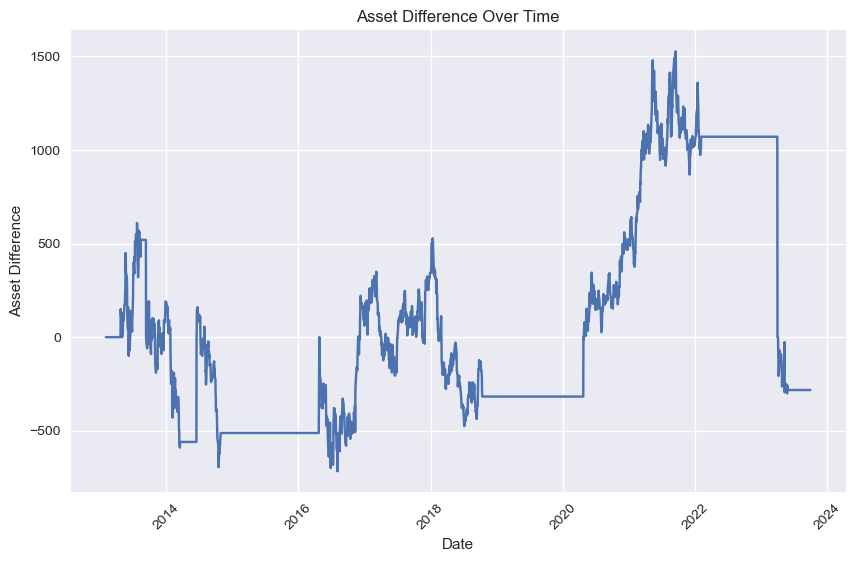

In [25]:
import matplotlib.pyplot as plt

# matplotlib의 스타일을 설정
plt.style.use('seaborn')

# 그래프를 그릴 데이터를 설정 (x축: 날짜, y축: asset_diff)

# 그래프를 그림
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정
plt.plot(df_index['asset_diff'])  # 꺾은선 그래프를 그림, 각 점에 마커를 표시
plt.title('Asset Difference Over Time')  # 그래프의 제목을 설정
plt.xlabel('Date')  # x축의 라벨을 설정
plt.ylabel('Asset Difference')  # y축의 라벨을 설정
plt.xticks(rotation=45)  # x축의 라벨을 45도 회전
plt.grid(True)  # 그리드를 표시

# 그래프를 화면에 표시


In [26]:
df_index

,index,index_moving_short_avg,index_moving_long_avg,signal,Close,asset_diff
날짜,,,,,,
2013-02-01,-0.589701,-0.589701,-0.589701,0.0,2550.0,0.0
2013-02-04,-0.579127,-0.584414,-0.584414,0.0,2740.0,0.0
2013-02-05,-0.577047,-0.581958,-0.581958,0.0,2670.0,0.0
2013-02-06,-0.594107,-0.584996,-0.584996,0.0,2770.0,0.0
2013-02-07,-0.604337,-0.588864,-0.588864,0.0,2730.0,0.0
...,...,...,...,...,...,...
2023-09-25,-0.134378,0.067860,0.626787,0.0,3717.0,-282.5
2023-09-26,-0.130931,0.063815,0.621195,0.0,3713.0,-282.5
2023-09-27,-0.112473,0.058690,0.615663,0.0,3676.0,-282.5


In [27]:
mean = df_index['asset_diff'][-250:].mean()
mean

435.83000634765625

In [28]:
mean_tot = df_index['asset_diff'].mean()
mean_tot

72.0968857233037